In [1]:
# Import data
import pandas as pd
import numpy as np
df = pd.read_csv('C:/Users/Thinkpad/Desktop/IE598/hw6/ccdefault.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
# Summary of data
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [3]:
# Train-test split
from sklearn.model_selection import train_test_split
X=df.iloc[:,1:24]
y=df.iloc[:,24]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42, stratify=y)

In [10]:
# In-sample scores
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(n_jobs = -1)
params_rf = {'n_estimators':[100,200,300,400,500,600]}
grid_rf = GridSearchCV(estimator = rf, param_grid = params_rf, cv = 10,n_jobs = -1)
grid_rf.fit(X_train, y_train)
allscores = grid_rf.cv_results_['mean_test_score']
print(allscores)

[0.81607407 0.81655556 0.81666667 0.81592593 0.81740741 0.81659259]


In [21]:
# CV info
print("The best model is the random forest with", grid_rf.best_params_['n_estimators'], "estimators")
print("computation time:")
print(grid_rf.cv_results_['mean_fit_time'])

The best model is the random forest with 500 estimators
computation time:
[ 9.24387636 19.46815922 29.90335188 41.70853913 54.99842234 59.25764618]


In [11]:
# Out-of-sample scores
from sklearn.metrics import accuracy_score
outscore=[]
for n in [100,200,300,400,500,600]:
    rf = RandomForestClassifier(n_estimators = n, n_jobs = -1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    outscore.append(accuracy_score(y_test,y_pred))
print(outscore)

[0.8203333333333334, 0.8146666666666667, 0.8166666666666667, 0.8176666666666667, 0.8193333333333334, 0.8186666666666667]


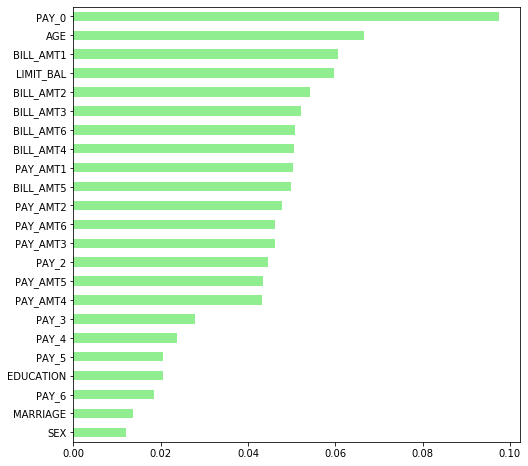

In [23]:
# Display the feature importances of best model
best_model = grid_rf.best_estimator_
import matplotlib.pyplot as plt
importances = pd.Series(best_model.feature_importances_, index = X.columns)
sorted_importances = importances.sort_values()
sorted_importances.plot(kind='barh', color='lightgreen')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [1]:
print("My name is: Yuzheng Nan")
print("My NetID is: ynan4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is: Yuzheng Nan
My NetID is: ynan4
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
